In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
data = pd.read_csv("zoo.csv",names=["Animal Name", "Hair", 'Feathers', 'Eggs', 'Milk', 'Airborne', 'Aquatic', 'Predator', 'Toothed','Backbone','Breathes','Venomous','Fins','Legs','Tail','Domestic','Catsize','Type'])
data

,Animal Name,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize,Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
X = data.drop(["Animal Name","Type"],axis = 1)
y = data["Type"]

In [4]:
X

,Hair,Feathers,Eggs,Milk,Airborne,Aquatic,Predator,Toothed,Backbone,Breathes,Venomous,Fins,Legs,Tail,Domestic,Catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [5]:
y

0      1
1      1
2      4
3      1
4      1
      ..
96     1
97     6
98     1
99     7
100    2
Name: Type, Length: 101, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 16), (21, 16), (80,), (21,))

## Using entropy

In [8]:
from sklearn.tree import DecisionTreeClassifier
clf_entropy = DecisionTreeClassifier(criterion  = 'entropy')
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [9]:
entropy_y_predicted = clf_entropy.predict(X_test)

In [10]:
confusion_matrix(y_test, entropy_y_predicted)

array([[10,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  2]])

In [11]:
accuracy_score(y_test, entropy_y_predicted)

0.9523809523809523

In [12]:
print(classification_report(y_test, entropy_y_predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         3
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.86      0.79      0.81        21
weighted avg       1.00      0.95      0.97        21



/home/root1/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


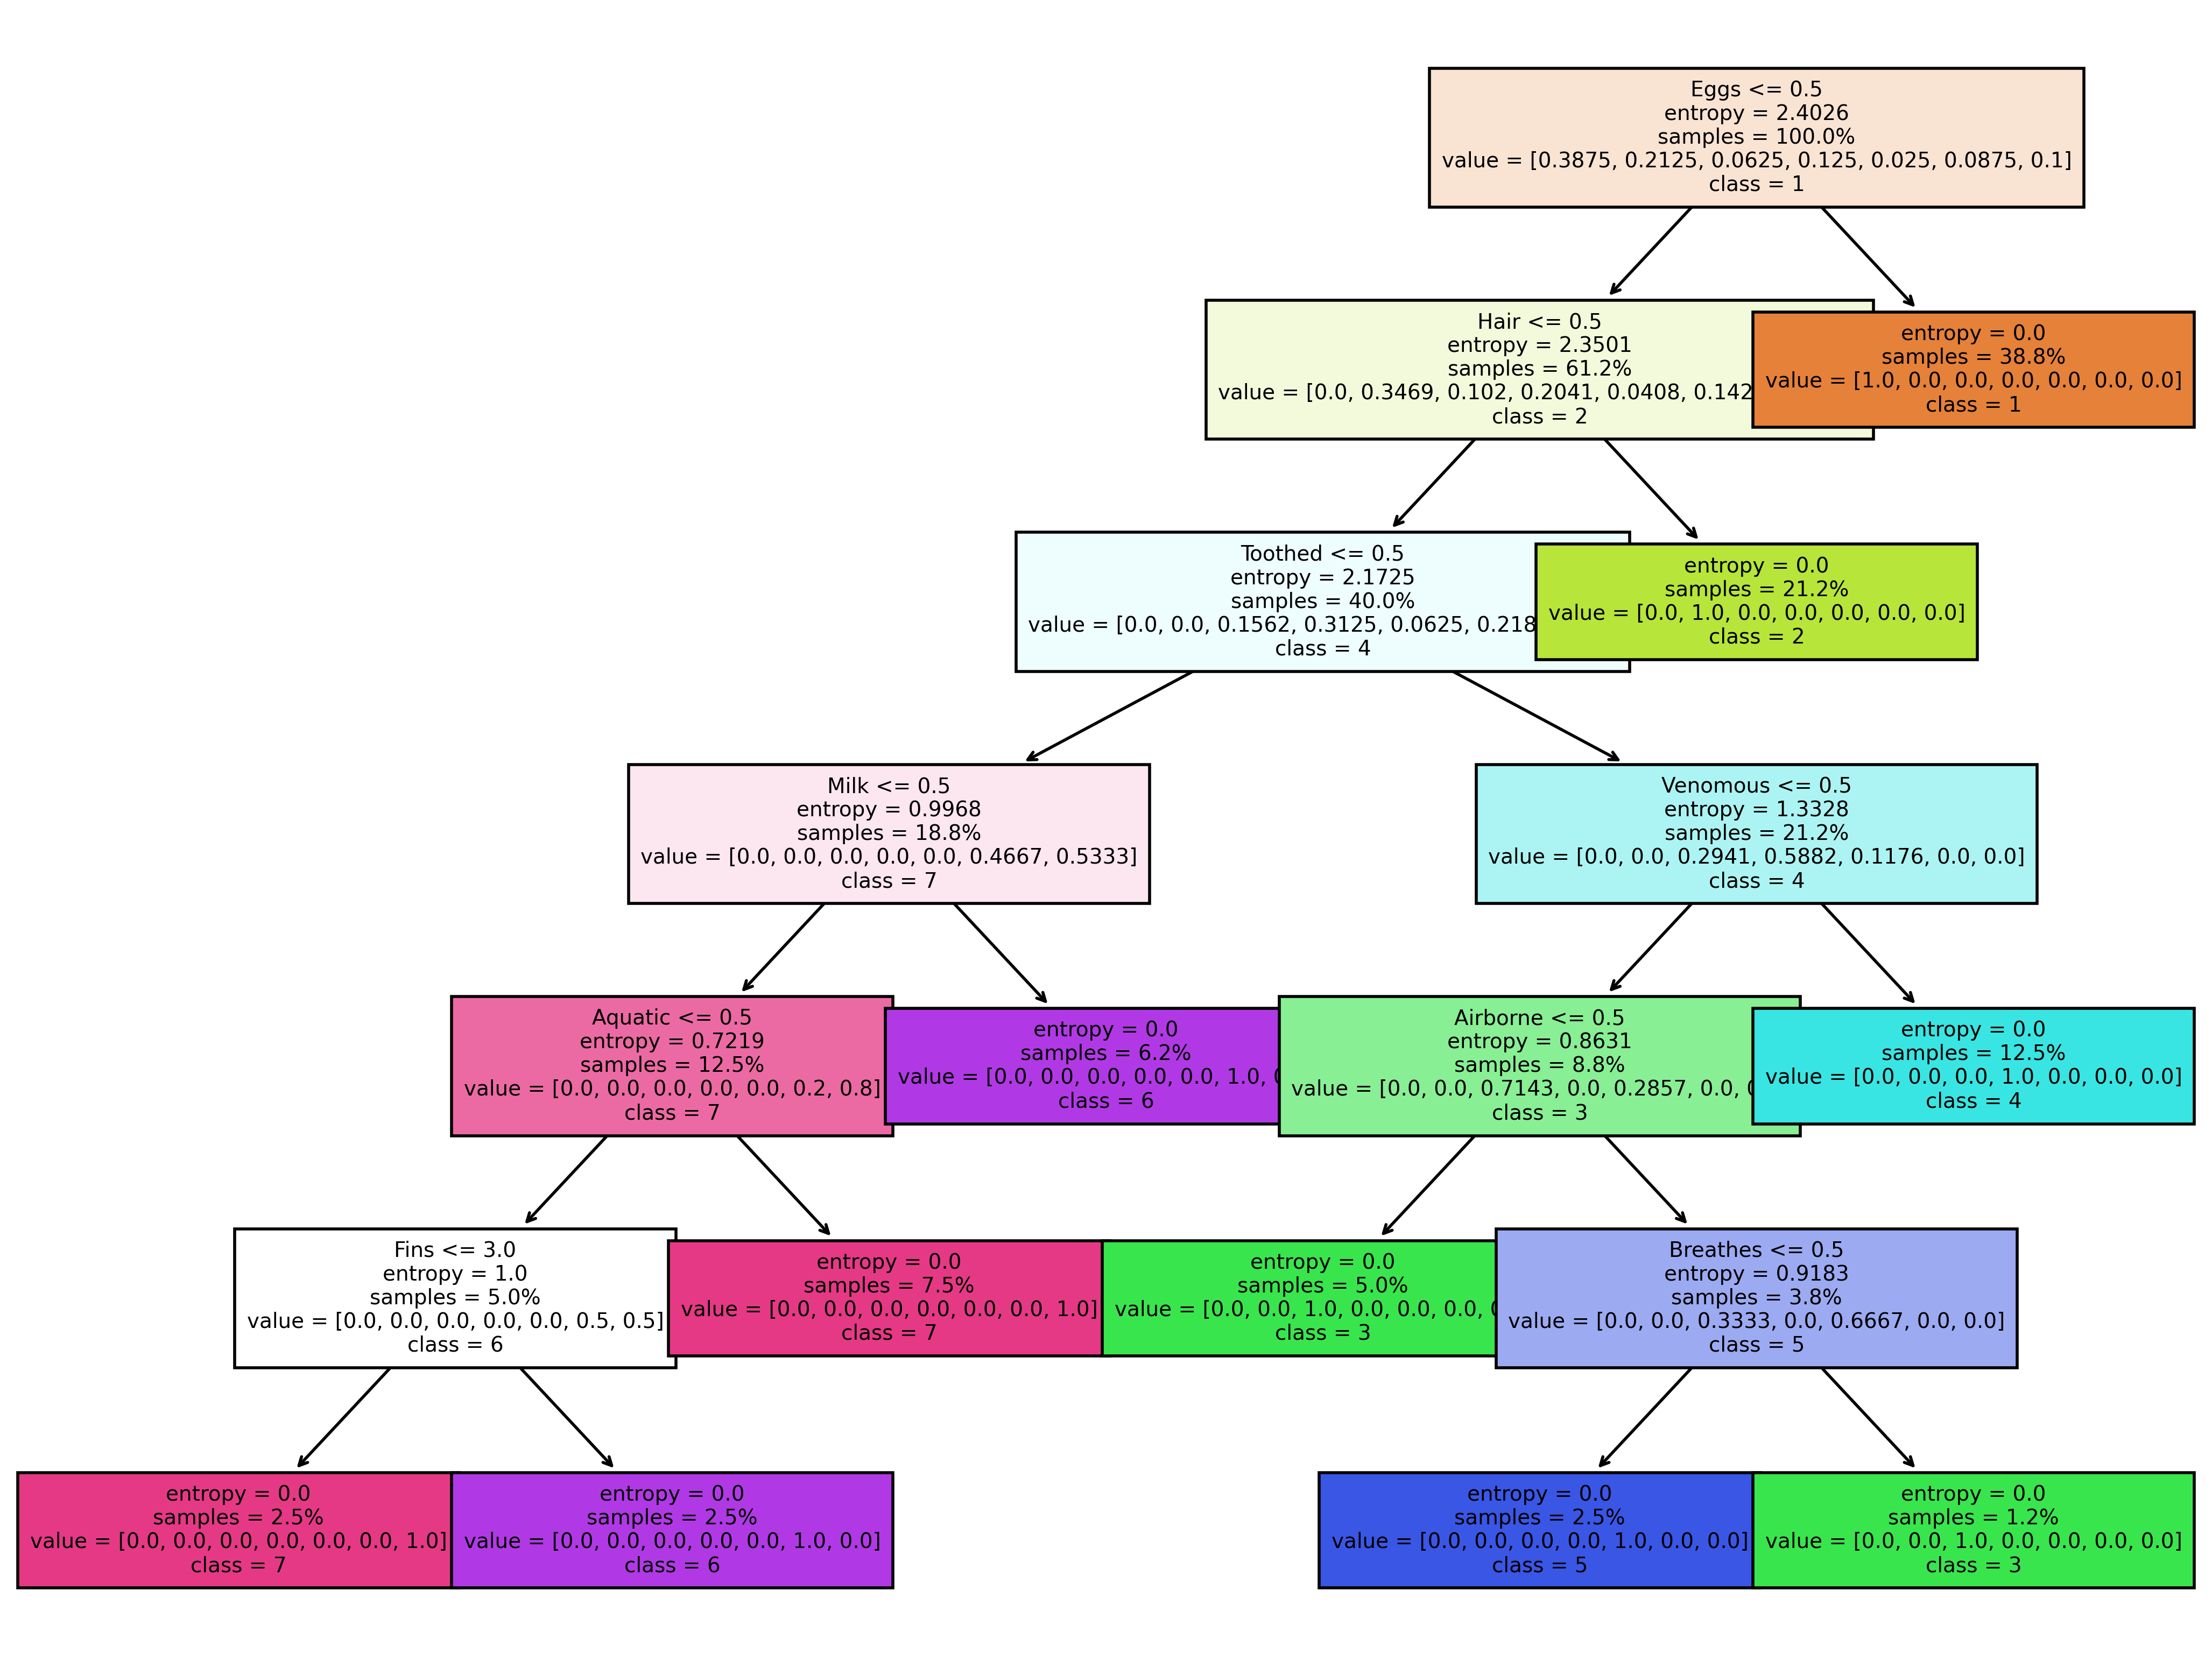

In [53]:
plt.figure(figsize=(13, 10), dpi = 400)
dec_tree=plot_tree(decision_tree = clf_entropy, 
                   feature_names = data.columns,
                   class_names = ["1","2","3","4","5","6","7"],
                   filled = True,
                   precision = 4,
                   fontsize = 7, 
                   proportion = True)

## Using gini

In [13]:
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
gini_y_predicted = clf_gini.predict(X_test)

In [15]:
confusion_matrix(y_test, gini_y_predicted)

array([[10,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  3,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  2]])

In [16]:
accuracy_score(y_test, gini_y_predicted)

0.9523809523809523

In [18]:
print(classification_report(y_test, gini_y_predicted))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         3
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         3
           5       1.00      0.50      0.67         2
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2

    accuracy                           0.95        21
   macro avg       0.86      0.79      0.81        21
weighted avg       1.00      0.95      0.97        21



In [26]:
from sklearn.tree import plot_tree 

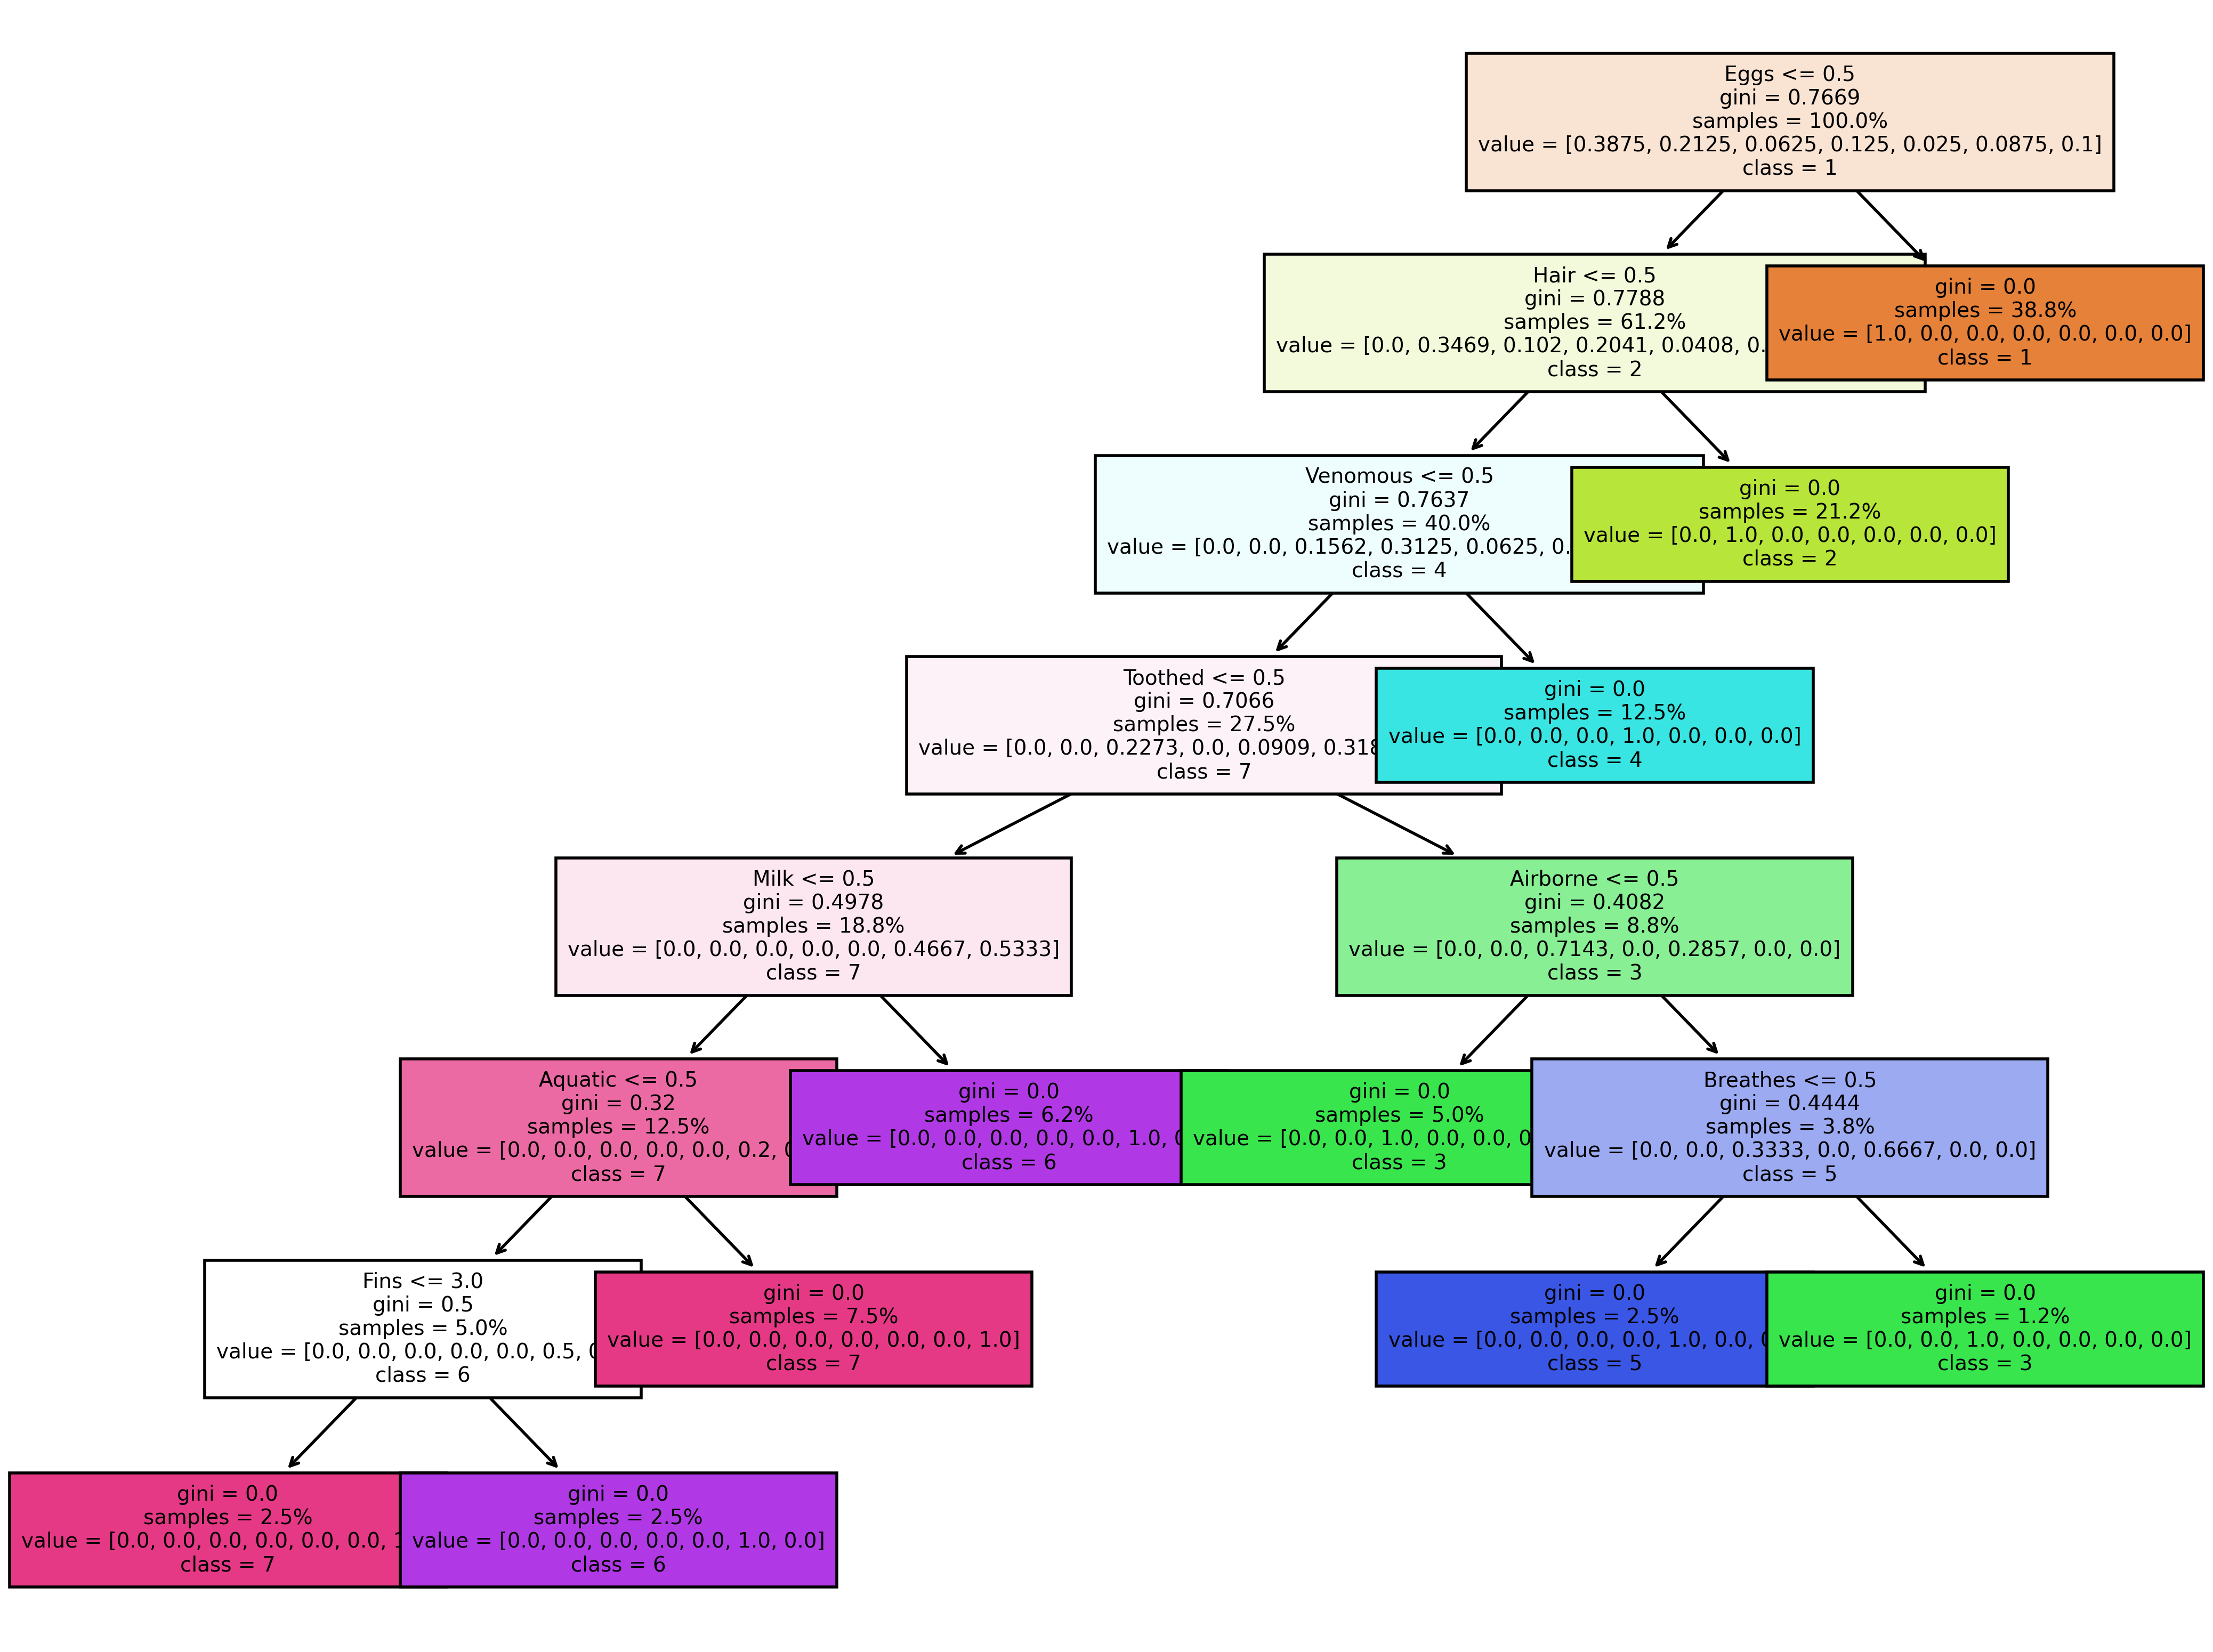

In [54]:
plt.figure(figsize=(13, 10), dpi = 400)
dec_tree=plot_tree(decision_tree = clf_gini, 
                   feature_names = data.columns,
                   class_names = ["1","2","3","4","5","6","7"],
                   filled = True,
                   precision = 4,
                   fontsize = 7, 
                   proportion = True)